# This is a simple kernel for text classification on Stanford Movie Dataset. It uses tf-df and BOW models. Algorithms used for fitting are Naive Bayes and Logistic Regression.

**Do not forget to upvote if you like it ;) Cheers!!**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


import os
print(os.listdir("../input"))
data=pd.read_csv("../input/dataset.csv")

data=data.iloc[:,1:]
# Any results you write to the current directory are saved as output.

['dataset.csv']


**Reshuffling Data**

In [2]:
data=data.sample(frac=1)

In [3]:
data.head()

,filename,reviews,label
10651,8337_10.txt,"Being a big fan of the romantic comedy genre, ...",1
22594,7836_3.txt,The first episode set the bar quite high i tho...,0
14334,11651_3.txt,Given that this movie was put together in less...,0
2157,11942_8.txt,In the funeral of the famous British journalis...,1
7793,5765_9.txt,Zombie Bloodbath is a movie made by zombie fan...,1


## Preprocessing

In [4]:
train=data

**Replace everything except letters and hashtags with blank space**

In [5]:
train['clean_reviews']=train['reviews'].str.replace("[^a-zA-Z#]"," ")


In [6]:
train['clean_reviews'].head()

10651    Being a big fan of the romantic comedy genre  ...
22594    The first episode set the bar quite high i tho...
14334    Given that this movie was put together in less...
2157     In the funeral of the famous British journalis...
7793     Zombie Bloodbath is a movie made by zombie fan...
Name: clean_reviews, dtype: object

**Removing words of size<4 as they do not contribute much**

In [7]:
train['clean_reviews']=train['clean_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [8]:
train['clean_reviews'].head()

10651    Being romantic comedy genre therefore having s...
22594    first episode quite high thought starred Willi...
14334    Given that this movie together less than year ...
2157     funeral famous British journalist Strombel McS...
7793     Zombie Bloodbath movie made zombie fans zombie...
Name: clean_reviews, dtype: object

**Tokenizing**

In [9]:
train['clean_reviews']=train['clean_reviews'].apply(lambda x: x.split())

In [10]:
train['clean_reviews'].head()

10651    [Being, romantic, comedy, genre, therefore, ha...
22594    [first, episode, quite, high, thought, starred...
14334    [Given, that, this, movie, together, less, tha...
2157     [funeral, famous, British, journalist, Strombe...
7793     [Zombie, Bloodbath, movie, made, zombie, fans,...
Name: clean_reviews, dtype: object

**Stemming: Stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word**

In [11]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
train['clean_reviews']=train['clean_reviews'].apply(lambda x: [stemmer.stem(i) for i in x])

In [12]:
train['clean_reviews'].head()

10651    [be, romant, comedi, genr, therefor, have, see...
22594    [first, episod, quit, high, thought, star, wil...
14334    [given, that, thi, movi, togeth, less, than, y...
2157     [funer, famou, british, journalist, strombel, ...
7793     [zombi, bloodbath, movi, made, zombi, fan, zom...
Name: clean_reviews, dtype: object

In [13]:
train['clean_reviews']=train['clean_reviews'].apply(lambda x:' '.join([w for w in x]))
#train['clean_reviews']=join[x for x in train['clean_reviews']]

In [14]:
train['clean_reviews'].head(10)

10651    be romant comedi genr therefor have seen larg ...
22594    first episod quit high thought star william hu...
14334    given that thi movi togeth less than year migh...
2157     funer famou british journalist strombel mcshan...
7793     zombi bloodbath movi made zombi fan zombi fan ...
5061     without question thi film greatest cinemat his...
24889    thi realli should have been star there mani cl...
6906     thi movi must peopl that enjoy soccer what str...
19224    give thi marriag year that stretch adriann cur...
17944    laugh whatsoev watch thi entir train wreck onl...
Name: clean_reviews, dtype: object

## Preprocessing done

## Visualizations

In [15]:
from wordcloud import WordCloud

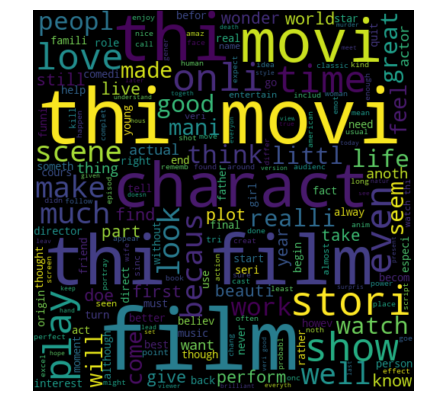

In [16]:
good_words=' '.join([text for text in train['clean_reviews'][train['label']==1]])
wc=WordCloud(height=500, width=500, random_state=21, max_font_size=110).generate(good_words)
plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

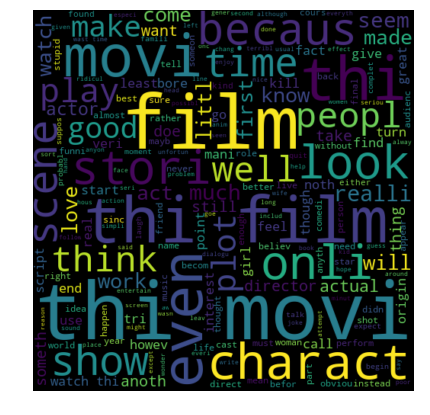

In [17]:
bad_words=' '.join([text for text in train['clean_reviews'][train['label']==0]])
wc=WordCloud(height=500, width=500, random_state=21, max_font_size=110).generate(bad_words)
plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Generating Feature Matrix: BOW and Tfidf Models

**Bag of Words Model(BOW)**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=2, max_df=0.90, max_features=1000,stop_words='english')# selects words that have min frequency above 2 and max frequnecy below 0.9*size of vocalubary.
#among these words, it chooses 1000 words with highest frequency
bow=cv.fit_transform(train['clean_reviews'])
#print(bow)

**bow is a feature matrix of shape 25000x1000(# of training examples,ie documents X # of features, ie. vocabulary**

**Tfidf Model: For understanding**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.','This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
vec=TfidfVectorizer()
X=vec.fit_transform(corpus)
print(vec.get_feature_names())
print(X.shape)
print(X)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)
  (0, 8)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 6)	0.38408524091481483
  (0, 2)	0.5802858236844359
  (0, 1)	0.46979138557992045
  (1, 8)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 6)	0.281088674033753
  (1, 1)	0.6876235979836938
  (1, 5)	0.5386476208856763
  (2, 8)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 6)	0.267103787642168
  (2, 0)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 4)	0.511848512707169
  (3, 8)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 6)	0.38408524091481483
  (3, 2)	0.5802858236844359
  (3, 1)	0.46979138557992045


**Tfidf Model**

In [20]:

tv=TfidfVectorizer(min_df=2, max_df=0.90,  max_features=1000, stop_words='english')
tfidf=tv.fit_transform(train['clean_reviews'])
vocab=tv.get_feature_names()
print(len(vocab))# length of vocabulary
#print(tfidf)


1000


**tfidf is a feature matrix of shape 25000x1000(# of trainign examples,ie documents X # of features, ie. vocabulary)**

**bow and tfidf are sparse matrices (Sparse matrix: matrix which has many zeros.) We need to convert them to Dataframe to work with them**

In [21]:
fea_bow=pd.DataFrame(bow.toarray())
fea_tf=pd.DataFrame(tfidf.toarray())

**Reducing Dimensions using Truncated SVD (Trucated SVD works well with sparse matrices).**

In [22]:
from sklearn.decomposition import PCA, TruncatedSVD

x_tsvd_bow=TruncatedSVD(n_components=100,algorithm='randomized',random_state=42).fit_transform(fea_bow.values)
x_tsvd_tf=TruncatedSVD(n_components=100,algorithm='randomized',random_state=42).fit_transform(fea_tf.values)

In [23]:
data_bow=pd.concat([pd.DataFrame(x_tsvd_bow),train['label']], axis=1)
data_tf=pd.concat([pd.DataFrame(x_tsvd_tf),train['label']],axis=1)
data_bow.shape

(25000, 101)

**Creating correlation matrix**

In [24]:
corr_bow=data_bow.corr()
corr_tf=data_tf.corr()

**Plotting correlatiton matrices**

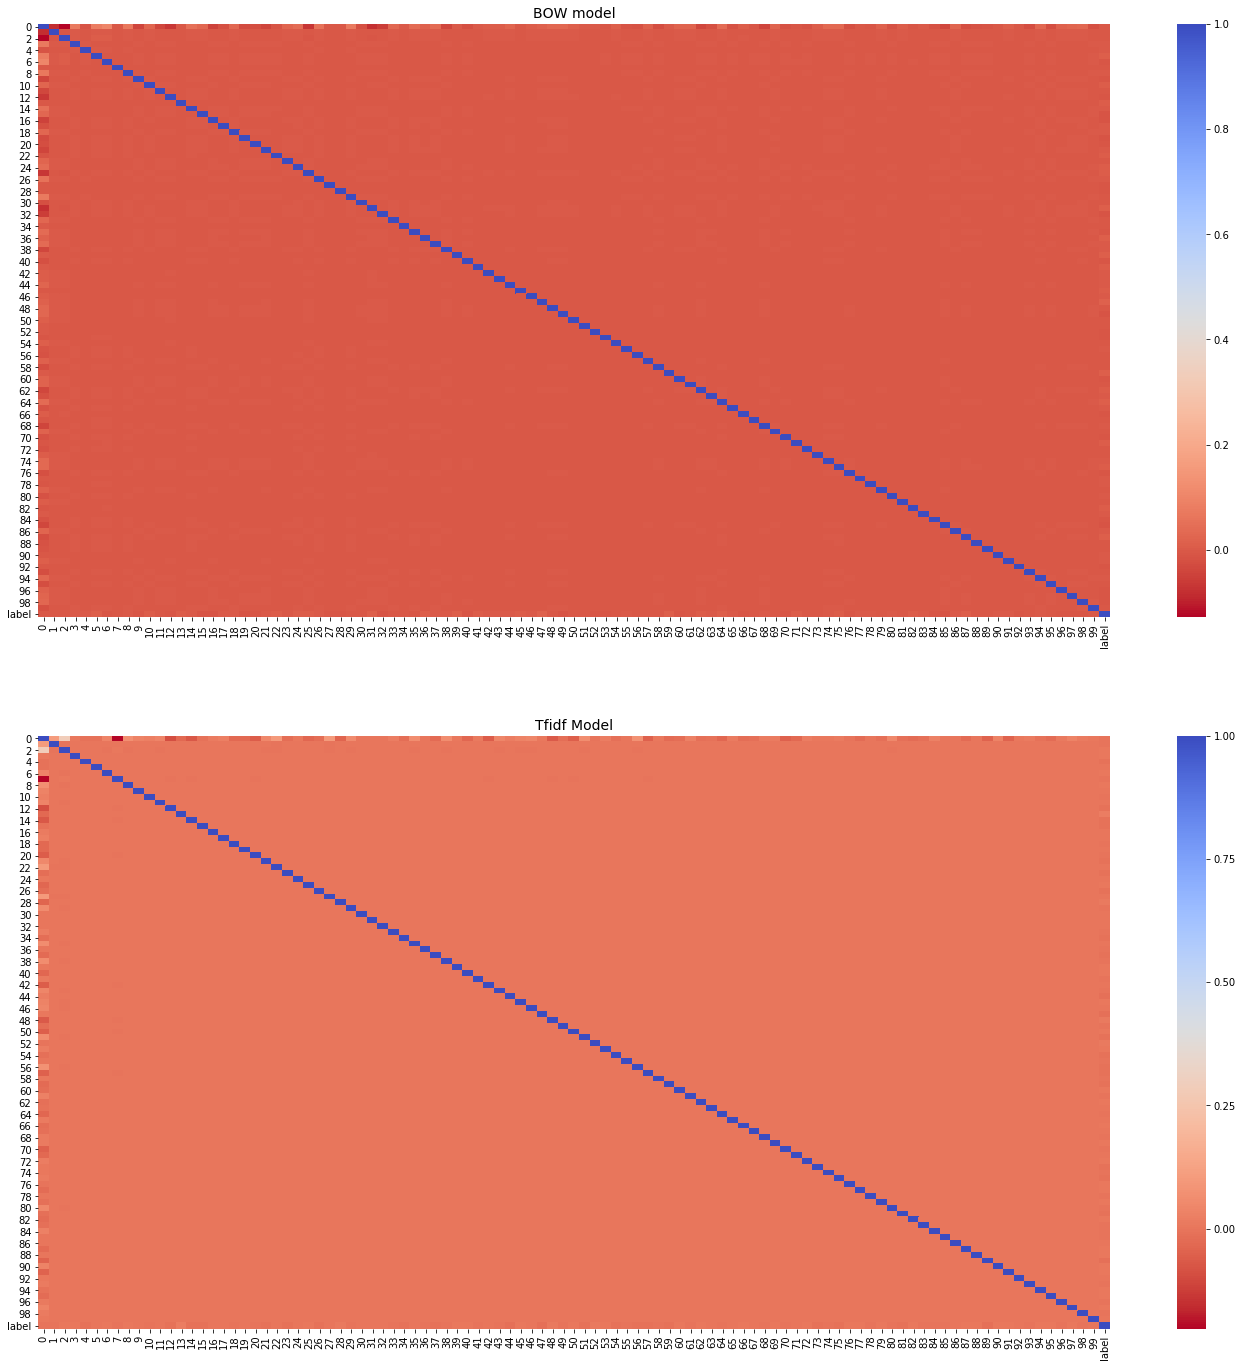

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,24))
sns.heatmap(corr_bow, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("BOW model", fontsize=14)

sns.heatmap(corr_tf, cmap='coolwarm_r', annot_kws={'size':23})
ax2.set_title('Tfidf Model', fontsize=14)
plt.show()

**Correlation Matrices don't help much**

In [26]:

pos_corr=corr_bow.index[corr_bow['label'] >0.010].tolist()#these eatures have strong +ve correlation
neg_corr=corr_tf.index[corr_tf['label'] <-0.011].tolist()#these eatures have strong -ve correlation
print(pos_corr,neg_corr)

[31, 36, 39, 47, 59, 64, 87, 'label'] [44]


## Model Fitting

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Fitting BOW model**

In [28]:
tr_bow=bow

x_tr_bow, x_val_bow, y_tr_bow, y_val_bow=train_test_split(tr_bow, train['label'],random_state=42,test_size=0.3)
model_bow=LogisticRegression()
y_tr_bow=pd.DataFrame(y_tr_bow)
model_bow.fit(x_tr_bow,y_tr_bow)
ans=model_bow.predict(x_val_bow)
f1_bow=f1_score(ans, y_val_bow)
print(f1_bow)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8457142857142858


**Fitting tfidf model**

In [29]:
train_tfidf = tfidf

x_tr_tf,x_val_tf,y_tr_tf,y_val_tf=train_test_split(train_tfidf,train['label'], test_size=0.3)
model_tf=LogisticRegression()
model_tf.fit(x_tr_tf,y_tr_tf)
y_pre_tf=model_tf.predict(x_val_tf)
f1_tf=f1_score(y_pre_tf,y_val_tf)
f1_tf


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8621861924686192

**Fitting tfidf model with reduced dimensions**

In [30]:
x_tr_tf_tsvd,x_val_tf_tsvd,y_tr_tf_tsvd,y_val_tf_tsvd=train_test_split(x_tsvd_tf,train['label'], test_size=0.3)
model_tsvd_tf=LogisticRegression()
model_tsvd_tf.fit(x_tr_tf_tsvd,y_tr_tf_tsvd)
y_pre_tf_tsvd=model_tsvd_tf.predict(x_val_tf_tsvd)
f1_tf_tsvd=f1_score(y_pre_tf_tsvd,y_val_tf_tsvd)
f1_tf_tsvd

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8464816010329245

**Trying Naive Bayes**

In [31]:
train_tfidf = tfidf

x_tr_tf,x_val_tf,y_tr_tf,y_val_tf=train_test_split(train_tfidf,train['label'], test_size=0.3)
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_tr_tf,y_tr_tf)
y_pre_tf=clf.predict(x_val_tf)
f1_tf=f1_score(y_pre_tf,y_val_tf)
f1_tf

0.8410457516339869